In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")
else:
    plt.rc("font", family="AppleGothic")

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="darkgrid")

# 데이터 불러오기

In [5]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 데이터 파악

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['charges'].max()

63770.42801

In [8]:
df['charges'].min()

1121.8739

<AxesSubplot: >

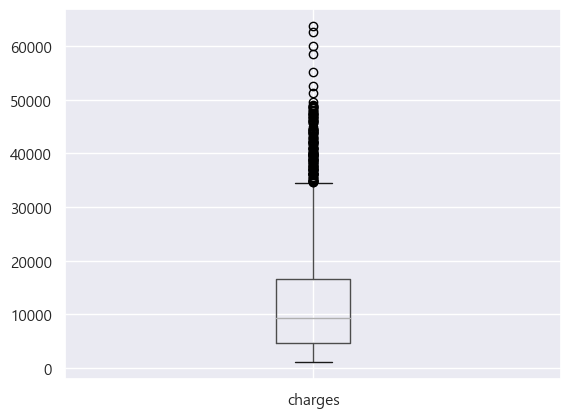

In [10]:
df.boxplot(column='charges')

In [9]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

# 데이터 전처리 및 파생변수 생성

In [66]:
# BMI 그룹 만들기

bins = [0, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# BMI 그룹별 의료비 평균 계산

bmi_grouped = df.groupby('bmi_group')
bmi_group_mean_charges = bmi_grouped['charges'].mean()

# 결과 출력 (bmi_group별 진료비 청구금액의 평균)

print(bmi_group_mean_charges)

bmi_group
Underweight     8657.620652
Normal         10435.440719
Overweight     10997.803881
Obese I        14429.421062
Obese II       17022.258883
Obese III      16784.615546
Name: charges, dtype: float64


In [67]:
# 연령 별 그룹 만들기

df['age_group'] = pd.cut(df['age'], bins=[0, 19, 29, 39, 49, 59, np.inf], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])

# 연령 별 의료비 평균 계산

age_grouped = df.groupby('age_group')
age_group_mean_charges = age_grouped['charges'].mean()

print(age_group_mean_charges)

age_group
10s      8407.349242
20s      9561.751018
30s     11738.784117
40s     14399.203564
50s     16495.232665
60s+    21248.021885
Name: charges, dtype: float64


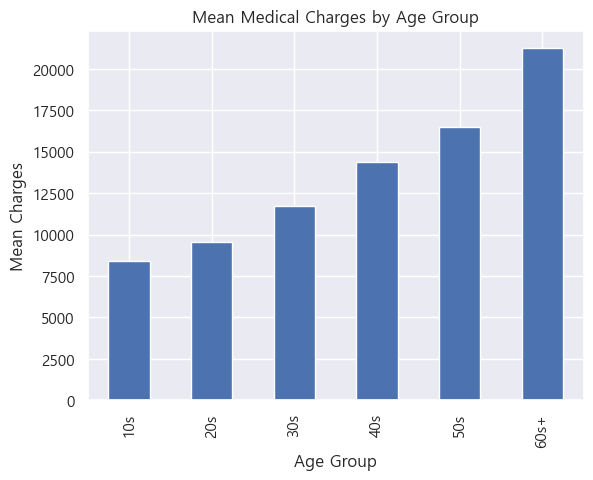

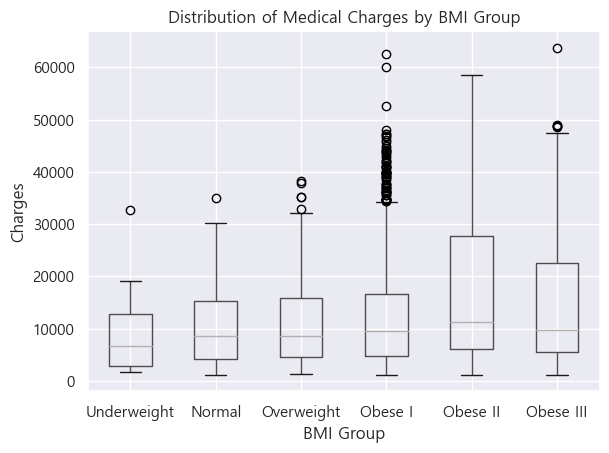

In [68]:
# 시각화

import matplotlib.pyplot as plt

# 연령대별 평균 의료비 그래프
age_group_mean_charges.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Mean Charges')
plt.title('Mean Medical Charges by Age Group')
plt.show()

# BMI 그룹별 의료비 분포 그래프
df.boxplot(column='charges', by='bmi_group')
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.title('Distribution of Medical Charges by BMI Group')
plt.suptitle("")
plt.show()

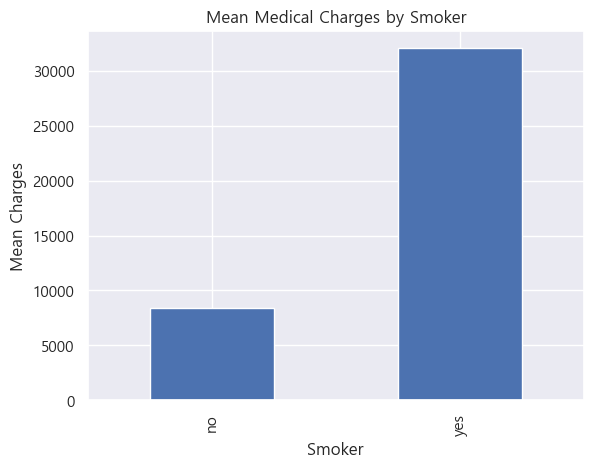

In [69]:
# 흡연 여부에 따른 의료비 청구금액 비교

smoker_charges = df.groupby('smoker')['charges'].mean()
smoker_charges.plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('Mean Charges')
plt.title('Mean Medical Charges by Smoker')
plt.show()

In [70]:
# 지역별 의료비 평균 계산

region_grouped = df.groupby('region')
region_mean_charges = region_grouped['charges'].mean()

print(region_mean_charges)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


 - 연령대가 높아짐에 따라 의료비 청구금액도 높아지는 것을 볼 수 있다.
 - 또한, 고도 비만 그룹에서 의료비 청구금액이 다른 그룹에 비해 높은 것으로 나타남. BMI가 높은 그룹일수록 의료비 청구금액이 높을 가능성이 있다.
 - 흡연 여부에 따른 의료비 청구금액의 차이가 매우 큰 것으로 보아 흡연여부가 의료비 청구금액에 미치는 영향이 큰 것을 알 수 있다.

In [71]:
# 상관관계 분석

corr_matrix = df.corr()
corr_matrix['charges'].sort_values(ascending=False)

C:\Users\GM220808\AppData\Local\Temp\ipykernel_12980\1848981595.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [72]:
# 성별과 흡연여부를 그룹화하여 의료비 청구금액의 평균을 표시 

df.groupby(['sex', 'smoker']).mean()[['charges']]

C:\Users\GM220808\AppData\Local\Temp\ipykernel_12980\2411172579.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sex', 'smoker']).mean()[['charges']]


charges
sex    smoker              
female no       8762.297300
       yes     30678.996276
male   no       8087.204731
       yes     33042.005975

In [76]:
# 연령별 흡연여부를 그룹화하여 의료비 청구금액의 평균을 표시

df.groupby(['age_group', 'smoker'])[['charges']].mean()

charges
age_group smoker              
10s       no       3365.419567
          yes     26390.231749
20s       no       4921.634844
          yes     28122.215715
30s       no       6337.362945
          yes     30271.246415
40s       no       9183.342097
          yes     32654.718697
50s       no      12749.344280
          yes     37508.752875
60s+      no      15232.709480
          yes     40630.695190

In [100]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_group,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,10s
1,18,male,33.770,1,no,southeast,1725.55230,Obese I,10s
2,28,male,33.000,3,no,southeast,4449.46200,Obese I,20s
3,33,male,22.705,0,no,northwest,21984.47061,Normal,30s
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,30s
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese I,50s
1334,18,female,31.920,0,no,northeast,2205.98080,Obese I,10s
1335,18,female,36.850,0,no,southeast,1629.83350,Obese II,10s
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,20s


In [39]:
# labelencoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['bmi_group'] = le.fit_transform(df['bmi_group'])
df['age_group'] = le.fit_transform(df['age_group'])

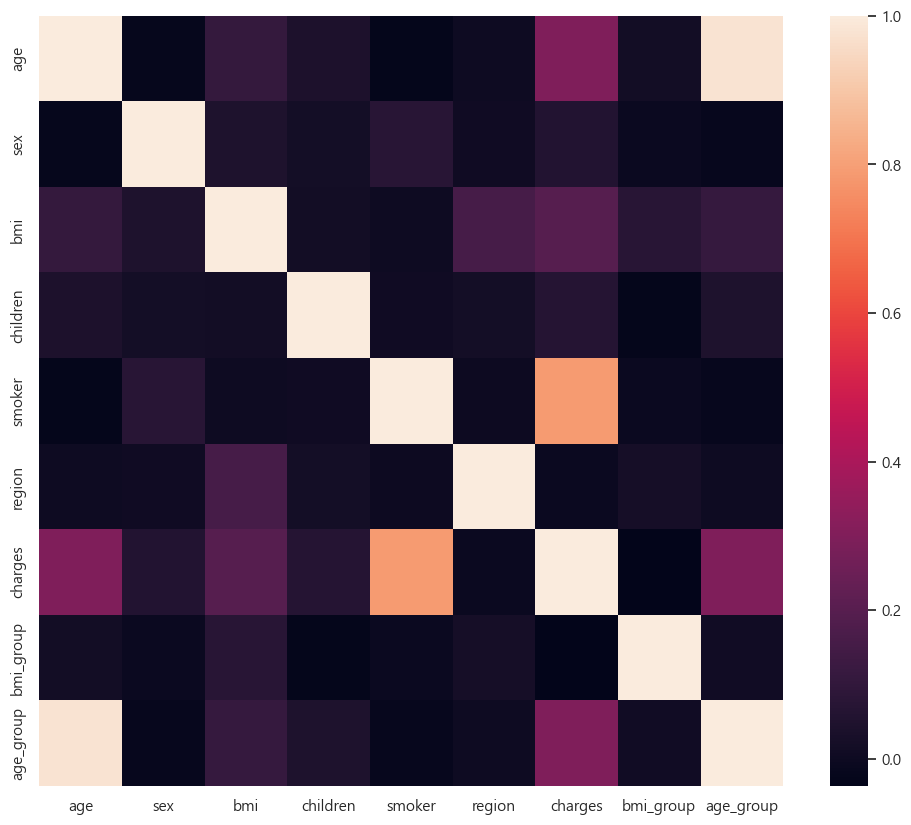

In [40]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

In [103]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_group,age_group
0,19,0,27.900,0,1,3,16884.92400,4,0
1,18,1,33.770,1,0,2,1725.55230,1,0
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,0,2
4,32,1,28.880,0,0,1,3866.85520,4,2
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1,4
1334,18,0,31.920,0,0,0,2205.98080,1,0
1335,18,0,36.850,0,0,2,1629.83350,2,0
1336,21,0,25.800,0,0,3,2007.94500,4,1


# 훈련 / 테스트 데이터 나누기

In [41]:
X = df[['age', 'bmi', 'age_group', 'bmi_group', 'smoker', 'region']]
y = df['charges']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
print(len(X_train))
print(len(X_test))

1070
268


# Modeling 및 Hyperparameter tunning

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Ridge Regression, GridSearchCV

In [45]:
ridge_model = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [46]:
print(grid_search.best_params_)

{'alpha': 0.1}


In [47]:
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.7779743629861269

### LinearRegression, StandardScaler

In [79]:
lr_model = make_pipeline(StandardScaler(), LinearRegression())

In [80]:
lr_model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [81]:
lr_model.score(X_test,y_test)

0.777998835456598

In [82]:
# MAE

y_pred_lr = lr_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

4257.398938130563

In [53]:
importances = model.feature_importances_
feature_names = X.columns

for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance:.4f}")

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

### Lasso Regression

In [151]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

# feature importance 출력
coef = pd.Series(lasso_model.coef_, index = X.columns)
imp_coef = coef.sort_values()
print("Lasso Regression Feature Importance:")
print(imp_coef)

Lasso Regression Feature Importance:
bmi_group     -448.427913
region        -273.537847
age_group      158.595618
age            243.078519
bmi            345.553876
smoker       23633.503946
dtype: float64


### DecisionTreeRegressor

In [152]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)

# feature importance 출력
importance = dt_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13674
Feature: 1, Score: 0.21992
Feature: 2, Score: 0.00257
Feature: 3, Score: 0.01184
Feature: 4, Score: 0.61106
Feature: 5, Score: 0.01787


### Random Forest Regression

In [153]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# feature importance 출력
importance = rf_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

Feature: 0, Score: 0.13320
Feature: 1, Score: 0.22786
Feature: 2, Score: 0.00499
Feature: 3, Score: 0.00933
Feature: 4, Score: 0.60949
Feature: 5, Score: 0.01513


### Support Vector Regression

In [154]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)

### Print R2 score of each model

In [155]:
print("Lasso Regression R2 Score:", r2_lasso)
print("Decision Tree Regression R2 Score:", r2_dt)
print("Random Forest Regression R2 Score:", r2_rf)
print("Support Vector Regression R2 Score:", r2_svr)

Lasso Regression R2 Score: 0.7779968268902955
Decision Tree Regression R2 Score: 0.6880473558589619
Random Forest Regression R2 Score: 0.8466205265116855
Support Vector Regression R2 Score: -0.06965656468629522
